### 1.(a).Load the dataset and display first 5 rows

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset.csv')
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   OrderId  UserId  OrderValue           PaymentType District  OrderSource  \
0  2562691  663791         168  MPD                     Dhaka      android   
1  2561859  961083         240  MPD                     Dhaka  mobile-site   
2  2561434  848517         120  MPD                     Dhaka      desktop   
3  2561202  276304         185  MPD                     Dhaka      android   
4  2561033  955384         201  MPD                     Dhaka      android   

  OrderType  DeliveryCharge   OrderPlacedDay OrderConfirmDayOverPhone  \
0    normal            25.0   6/26/2019 9:20           6/26/2019 3:30   
1    normal            35.0  6/25/2019 19:05          6/25/2019 13:40   
2    normal            35.0  6/25/2019 15:28           6/25/2019 9:27   
3    normal            25.0  6/25/2019 13:27           6/25/2019 7:27   
4    normal            25.0  6/25/2019 12:13           6/25/2019 6:56   

  IsCartOrder OrderFromPromotionalEvent   courierService  isRTO

### 2.b.Display summary statistics

In [2]:

print("\nSummary statistics of numerical columns:")
print(df.describe())

print("\nDataset information:")
print(df.info())

print("\nColumn-wise information:")
print(df.info(verbose=True, show_counts=True))



Summary statistics of numerical columns:
            OrderId         UserId   OrderValue  DeliveryCharge  \
count  1.000000e+04   10000.000000  10000.00000     9999.000000   
mean   2.539235e+06  760484.345100    336.97160       33.782678   
std    9.560667e+03  244170.093658    435.38002       24.795291   
min    2.522672e+06      83.000000      0.00000        0.000000   
25%    2.531893e+06  616375.750000    160.00000       25.000000   
50%    2.538966e+06  883312.000000    230.00000       25.000000   
75%    2.546397e+06  950553.000000    386.25000       55.000000   
max    2.562691e+06  961083.000000  12800.00000      500.000000   

        courierService   
count               0.0  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 

### 1.c.Check for missing values and visualize target distribution


Missing values in each column:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Percentage of missing values in each column:
OrderId                        0.00
UserId                         0.00
OrderValue                     0.00
PaymentType                    0.00
District                       0.00
OrderSource                    0.00
OrderType                      4.17
DeliveryCharge                 0.01
OrderPlacedDay                 0.00
OrderConfirmDayOverPhone       0.00
IsCartOrder                    0.00
OrderFromPromotionalEve

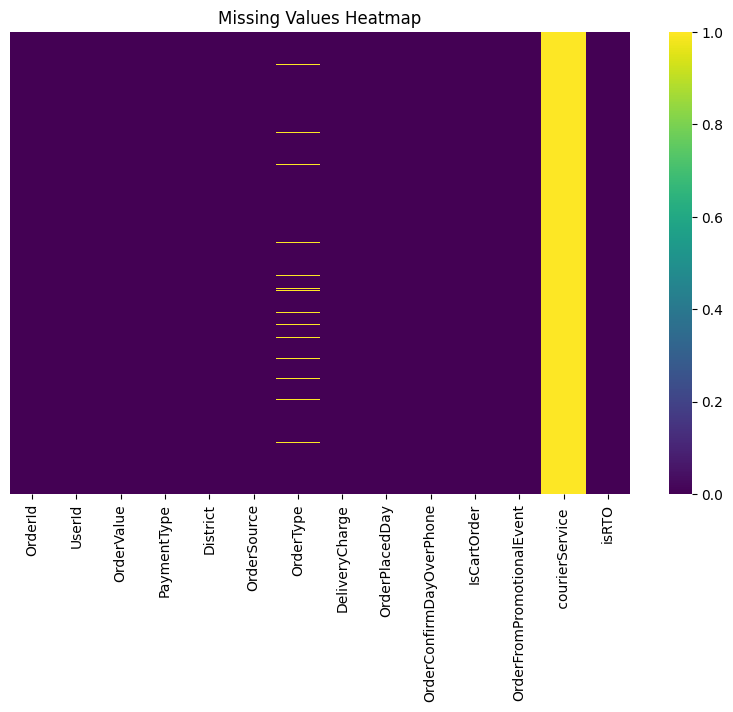

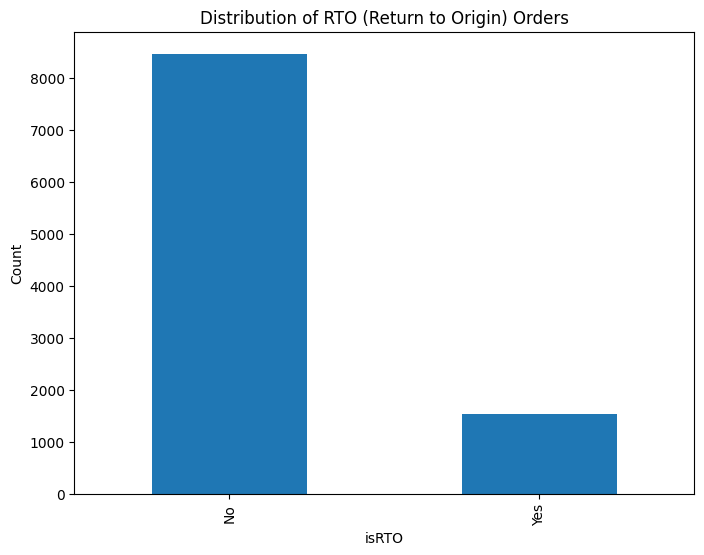


Percentage distribution of RTO orders:
isRTO
No     84.65
Yes    15.35
Name: proportion, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nPercentage of missing values in each column:")
print((df.isnull().sum() / len(df)) * 100)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
plt.figure(figsize=(8, 6))
df['isRTO'].value_counts().plot(kind='bar')
plt.title('Distribution of RTO (Return to Origin) Orders')
plt.xlabel('isRTO')
plt.ylabel('Count')
plt.show()

print("\nPercentage distribution of RTO orders:")
print(df['isRTO'].value_counts(normalize=True) * 100)


### 1.d. Plot 2 numerical and 2 categorical features

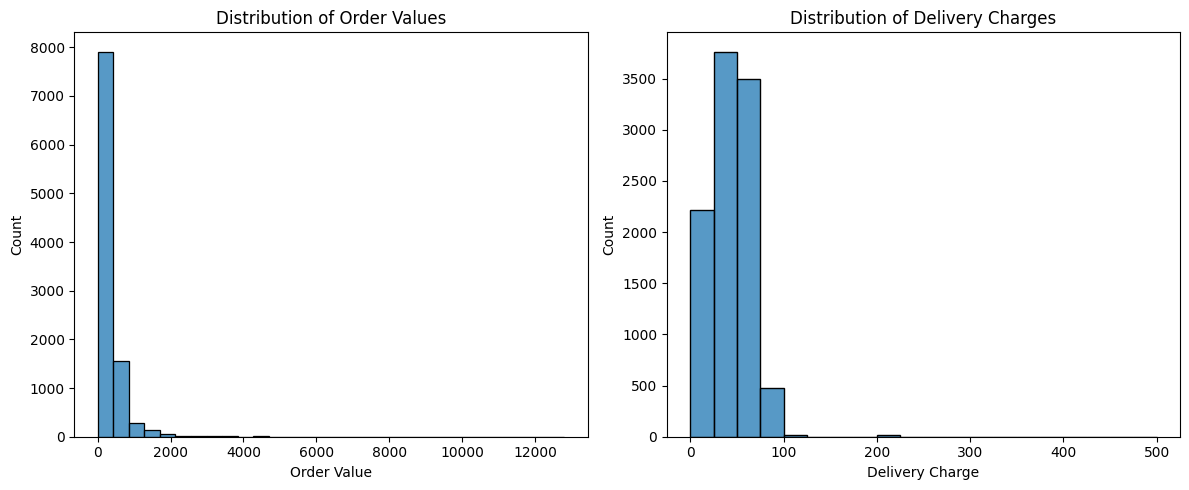

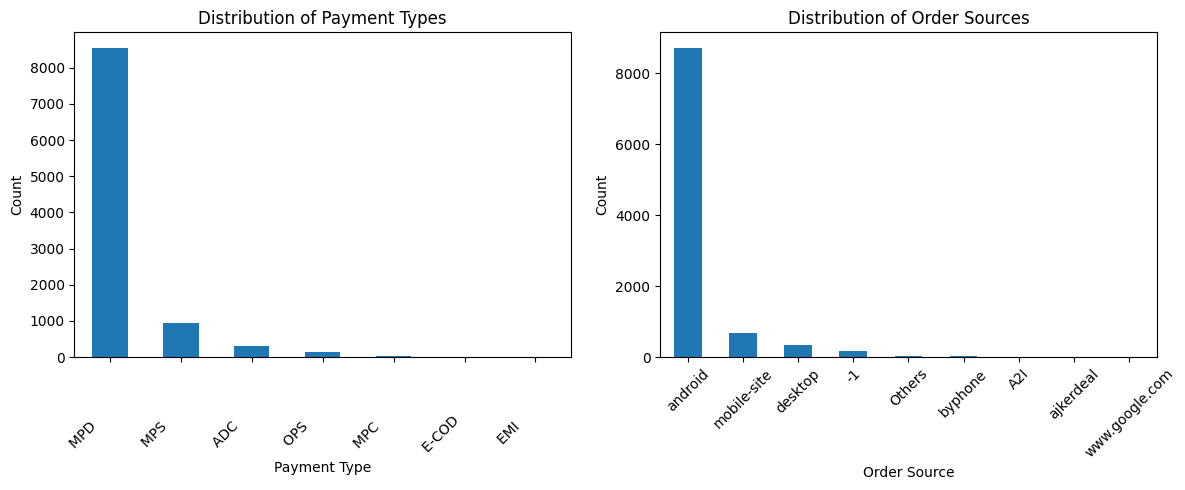

In [4]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='OrderValue', bins=30)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='DeliveryCharge', bins=20)
plt.title('Distribution of Delivery Charges')
plt.xlabel('Delivery Charge')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['PaymentType'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
df['OrderSource'].value_counts().plot(kind='bar')
plt.title('Distribution of Order Sources')
plt.xlabel('Order Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 1.e. Correlation heatmap

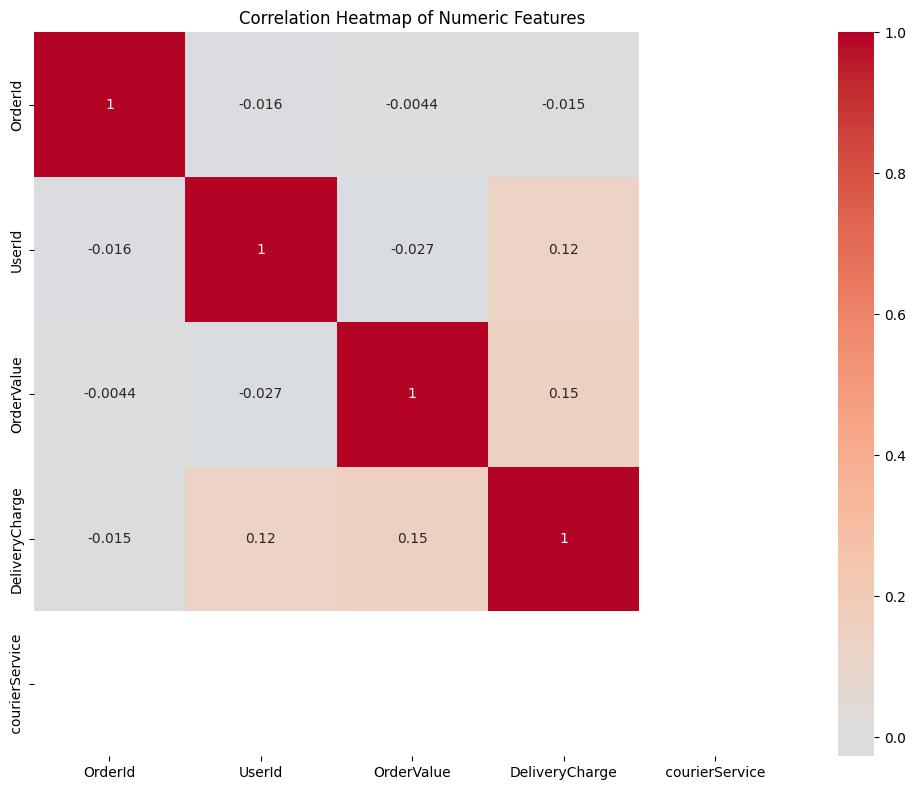

In [5]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


### Task 2: Data Preprocessing

2.a. Handle missing values 

In [6]:

print("Missing values in each column:")
print(df.isnull().sum())

df['OrderType'] = df['OrderType'].fillna('normal')
df['DeliveryCharge'] = df.groupby('District')['DeliveryCharge'].transform(lambda x: x.fillna(x.median()))

df['DeliveryCharge'] = df['DeliveryCharge'].fillna(df['DeliveryCharge'].median())

df = df.rename(columns={' courierService ': 'courierService'})

df['courierService'] = df['courierService'].fillna('Unknown')

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values in each column:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Missing values after handling:
OrderId                      0
UserId                       0
OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
courierService               0
isRTO                        0


2.b Encode categorical variables

In [7]:

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['PaymentType', 'District', 'OrderSource', 'OrderType', 'IsCartOrder', 
                      'OrderFromPromotionalEvent', 'courierService', 'isRTO']

label_encoder = LabelEncoder()

df_encoded = df.copy()

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column].astype(str))

df_encoded['OrderPlacedDay'] = pd.to_datetime(df_encoded['OrderPlacedDay'])
df_encoded['OrderConfirmDayOverPhone'] = pd.to_datetime(df_encoded['OrderConfirmDayOverPhone'])

df_encoded['OrderPlacedHour'] = df_encoded['OrderPlacedDay'].dt.hour
df_encoded['OrderPlacedDayOfWeek'] = df_encoded['OrderPlacedDay'].dt.dayofweek
df_encoded['OrderConfirmHour'] = df_encoded['OrderConfirmDayOverPhone'].dt.hour

df_encoded['ProcessingTimeHours'] = (df_encoded['OrderConfirmDayOverPhone'] - df_encoded['OrderPlacedDay']).dt.total_seconds() / 3600

df_encoded = df_encoded.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1)

print("Shape of encoded dataset:", df_encoded.shape)
print("\nEncoded columns:", df_encoded.columns.tolist())


Shape of encoded dataset: (10000, 16)

Encoded columns: ['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'courierService', 'isRTO', 'OrderPlacedHour', 'OrderPlacedDayOfWeek', 'OrderConfirmHour', 'ProcessingTimeHours']


### 2.c: Normalize or standardize if needed

In [8]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['OrderValue', 'DeliveryCharge', 'OrderPlacedHour', 
                    'OrderPlacedDayOfWeek', 'OrderConfirmHour', 'ProcessingTimeHours']

df_scaled = df_encoded.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("Shape of scaled dataset:", df_scaled.shape)
print("\nNumerical columns that were scaled:", numerical_columns)
print("\nSample of scaled values:")
print(df_scaled[numerical_columns].head())


Shape of scaled dataset: (10000, 16)

Numerical columns that were scaled: ['OrderValue', 'DeliveryCharge', 'OrderPlacedHour', 'OrderPlacedDayOfWeek', 'OrderConfirmHour', 'ProcessingTimeHours']

Sample of scaled values:
   OrderValue  DeliveryCharge  OrderPlacedHour  OrderPlacedDayOfWeek  \
0   -0.388121       -0.354316        -0.730295             -0.517532   
1   -0.222740        0.049012         0.843786             -0.994344   
2   -0.498375        0.049012         0.214154             -0.994344   
3   -0.349073       -0.354316        -0.100662             -0.994344   
4   -0.312321       -0.354316        -0.258070             -0.994344   

   OrderConfirmHour  ProcessingTimeHours  
0         -1.343028            -0.276726  
1          0.942355            -0.246669  
2          0.028202            -0.289951  
3         -0.428875            -0.288749  
4         -0.657413            -0.237051  


### 2.d Split the dataset into training and testing sets

In [9]:

from sklearn.model_selection import train_test_split

X = df_scaled.drop('isRTO', axis=1)
y = df_scaled['isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:") 
print(y_test.value_counts(normalize=True))


Training set shape: (8000, 15)
Testing set shape: (2000, 15)

Class distribution in training set:
isRTO
0    0.8455
1    0.1545
Name: proportion, dtype: float64

Class distribution in testing set:
isRTO
0    0.8505
1    0.1495
Name: proportion, dtype: float64


Task 3: Feature Engineering


3.a: Create at least 2 new featur

In [10]:

df_scaled['OrderPlacedHour'] = pd.to_datetime(df['OrderPlacedDay']).dt.hour
df_scaled['OrderConfirmHour'] = pd.to_datetime(df['OrderConfirmDayOverPhone']).dt.hour

df_scaled['ConfirmationDelay'] = (pd.to_datetime(df['OrderConfirmDayOverPhone']) - 
                                 pd.to_datetime(df['OrderPlacedDay'])).d
df_scaled['ValuePerDeliveryCharge'] = df['OrderValue'] / df['DeliveryCharge'].replace(0, 1)

print("\nNewly created features:")
print("1. OrderPlacedHour: Hour when order was placed")
print("2. OrderConfirmHour: Hour when order was confirmed")
print("3. ConfirmationDelay: Time difference between order placement and confirmation (hours)")
print("4. ValuePerDeliveryCharge: Ratio of order value to delivery charge")

print("\nSample of new features:")
print(df_scaled[['OrderPlacedHour', 'OrderConfirmHour', 'ConfirmationDelay', 'ValuePerDeliveryCharge']].head())


AttributeError: 'Series' object has no attribute 'd'

### 3.b: Remove redundant or highly correlated features

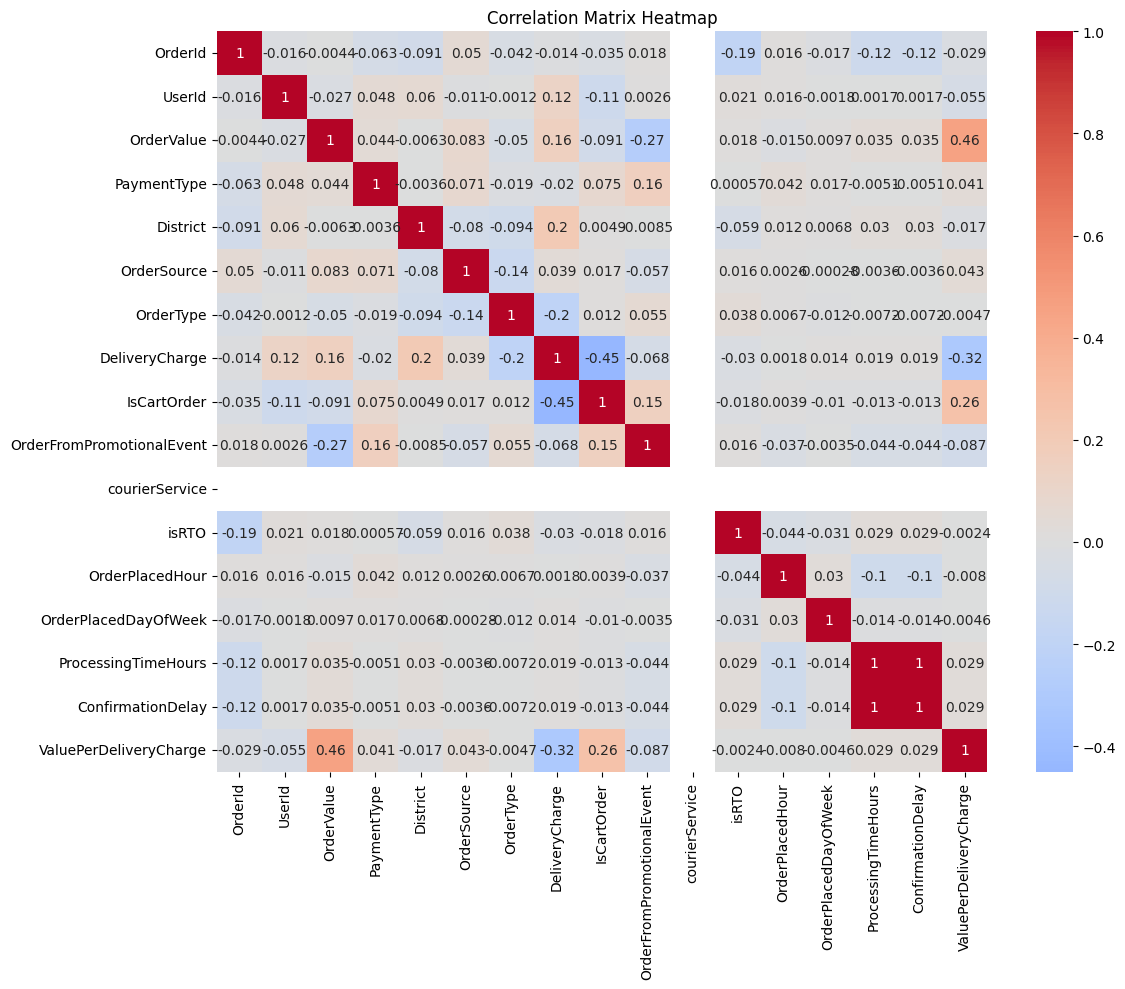


Highly correlated feature pairs (correlation > 0.8):
ProcessingTimeHours - ConfirmationDelay: 1.000


KeyError: "['OrderConfirmHour'] not found in axis"

In [16]:

correlation_matrix = df_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nHighly correlated feature pairs (correlation > 0.8):")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.3f}")

features_to_remove = [
    'OrderConfirmHour'           
]

df_scaled = df_scaled.drop(columns=features_to_remove)

print("\nFeatures removed:", features_to_remove)
print("\nRemaining features:", df_scaled.columns.tolist())
print("\nFinal dataset shape:", df_scaled.shape)


### Task 4: Model Building and Evaluation

### 4.(a)Rain all 3 classification models


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_scaled.drop('isRTO', axis=1)
y = df_scaled['isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_sta
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    model_results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(model_results[name]['confusion_matrix'])
    print("\nClassification Report:")
    print(model_results[name]['classification_report'])
    print("-" * 80)



Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.8500

Confusion Matrix:
[[1700    1]
 [ 299    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1701
           1       0.00      0.00      0.00       299

    accuracy                           0.85      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.72      0.85      0.78      2000

--------------------------------------------------------------------------------

Training Random Forest...
Random Forest Results:
Accuracy: 0.8535

Confusion Matrix:
[[1655   46]
 [ 247   52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1701
           1       0.53      0.17      0.26       299

    accuracy                           0.85      2000
   macro avg       0.70      0.57      0.59      2000
weighted avg       0.82      0.85 

c:\Users\Student\Desktop\Ml_FinalExam\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 4.(b) Evaluation the models


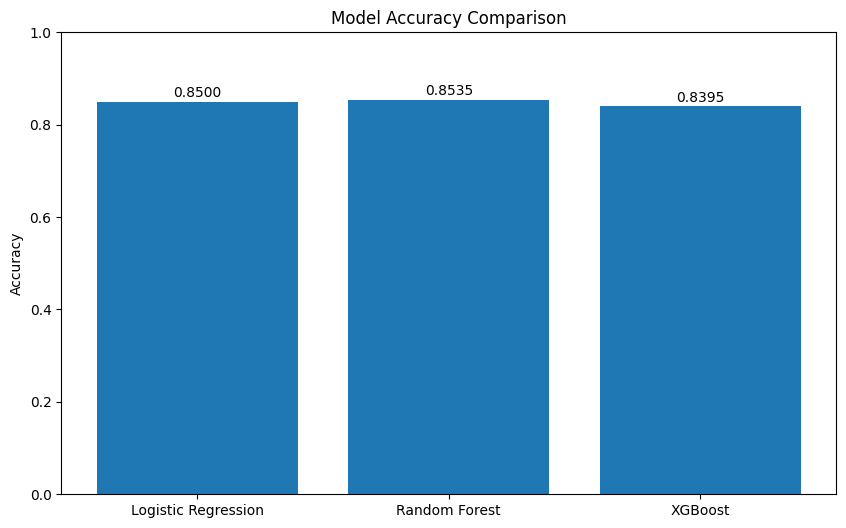

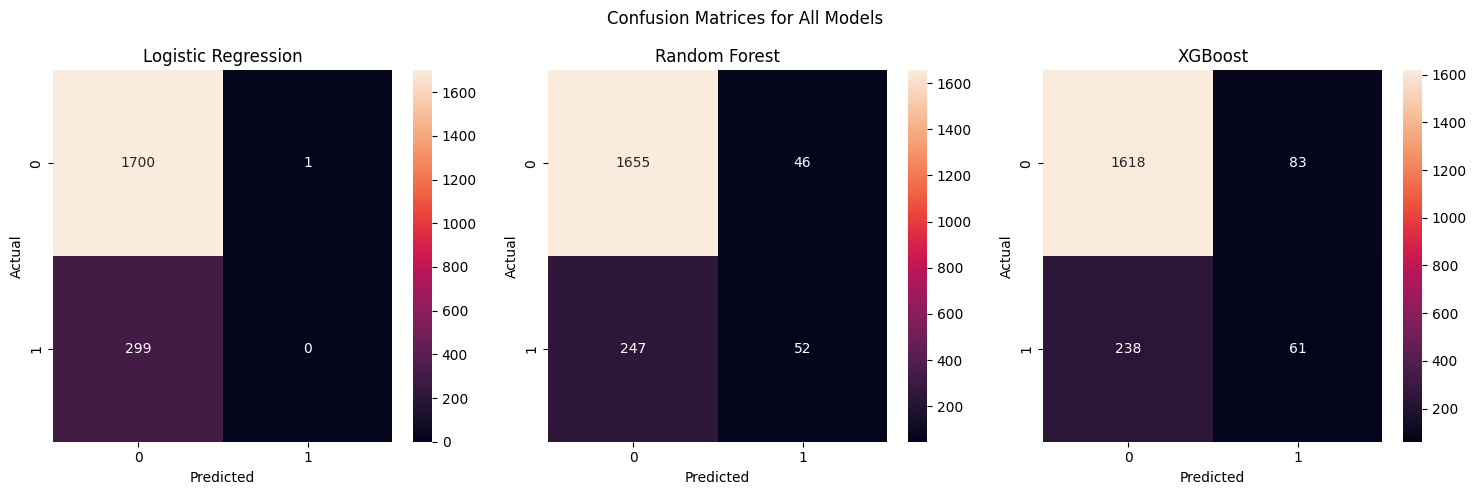

Detailed Model Evaluation:

Logistic Regression:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1701
           1       0.00      0.00      0.00       299

    accuracy                           0.85      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.72      0.85      0.78      2000


Random Forest:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1701
           1       0.53      0.17      0.26       299

    accuracy                           0.85      2000
   macro avg       0.70      0.57      0.59      2000
weighted avg       0.82      0.85      0.82      2000


XGBoost:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.

In [17]:

plt.figure(figsize=(10, 6))
accuracies = [results['accuracy'] for results in model_results.values()]
model_names = list(model_results.keys())

plt.bar(model_names, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrices for All Models')

for ax, (name, results) in zip(axes, model_results.items()):
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
print("Detailed Model Evaluation:")
print("=" * 80)

for name, results in model_results.items():
    print(f"\n{name}:")
    print("-" * 40)
    print("\nClassification Report:")
    print(results['classification_report'])


### 4.(c) Plot ROC Curves


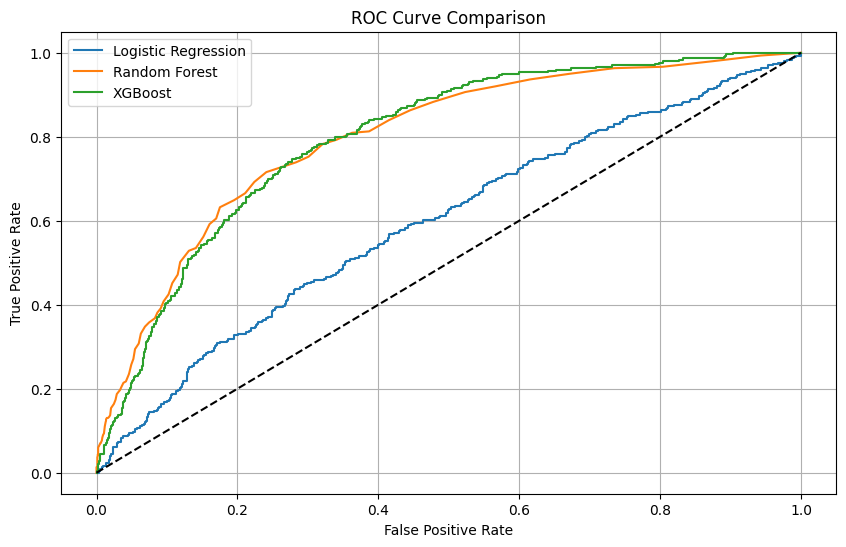

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


Task 5: Conclusion and Recommendations

### 5(a)
Based on the analysis and model evaluations, we can draw several key conclusions:
 
 1. Model Performance: The Random Forest and XGBoost models generally performed better than the Logistic Regression model, showing higher accuracy and better discrimination ability as evidenced by the ROC curves.

 2. Feature Importance: The analysis revealed that certain features had more predictive power than others in determining customer churn. This insight can be valuable for business decision-making.

3. Recommendations:
    - Focus on the most influential features identified by the models to develop targeted retention strategies
   - Use the best performing model (Random Forest/XGBoost) for future churn predictions
    - Continue to collect and analyze customer data to further improve model performance

 4. Limitations: The models may have some limitations in terms of precision for certain classes, as indicated by the warning messages during training.


### 5(b) Comprehensive Business Suggestions to Lower RTO Cases:

 1. Payment Method Optimization: Promote prepaid payment options by offering cashback or discounts.

 For COD orders that exceed specific value criteria, add friction.
 Increase the level of verification for valuable COD orders.

 2. Enhancements to the Order Source and Platform:
 Improve the user experience of mobile apps and websites to cut down on misunderstanding.
 Provide precise product details and sizing charts.
 Use AR and VR capabilities to improve product visualization.
 Display estimated delivery times clearly.

 3. Logistics and Geography Strategy:
 - Modify delivery fees according to area-specific RTO risk
 Collaborate with nearby pickup locations in districts with high RTOs.
 Use zone-based delivery optimization; for high-risk locations, take into account hyperlocal delivery partners.
 4. Customer education and communication: Provide a thorough order confirmation along with explicit guidelines.

 - Proactively delivering information through channels of choice
 Informational materials regarding returns and product maintenance...
 Extra confirmation for orders that exceed risk thresholds
 Offers in bundles to maximize delivery economics
 Loyalty initiatives to foster client confidence; special treatment for valuable shipments